In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,precision_recall_curve,r2_score
%matplotlib inline

# New Section

# New Section

In [0]:
df= pd.read_csv("/content/creditcardfraud.csv")

In [0]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [0]:
df=df.drop(columns="Time")

In [0]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [0]:
df.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [0]:
df=df.dropna()

In [0]:
df.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [0]:
x = df.iloc[:,0:29]
x.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [0]:
y=df.iloc[:,-1]
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Class, dtype: float64

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
scaled_features = scaler.transform(x)

In [0]:
x= pd.DataFrame(scaled_features,columns=x.columns)

In [0]:
x.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.588860,-0.023394,1.398173,0.899805,-0.043570,0.282527,0.285541,0.034752,0.361371,0.106587,-0.754318,-0.483736,-0.964175,-0.384178,1.372558,-0.514369,0.155787,0.139757,0.522226,0.272055,0.016687,0.608477,-0.115036,0.096562,-0.008048,-0.435991,0.336279,-0.068939,0.192785
1,0.781061,0.180993,-0.382039,0.211525,0.248912,-0.135376,0.024019,0.023461,-0.189006,-0.133416,1.270050,1.016698,0.458270,-0.212076,0.477508,0.522598,-0.183931,-0.106957,-0.150276,-0.149068,-0.272193,-0.836227,0.217150,-0.587131,0.079423,0.200319,-0.023959,0.040612,-0.359670
2,-0.588080,-0.787668,0.824914,0.160922,-0.164632,1.309057,0.738816,0.158467,-1.308252,0.215383,0.345729,0.125950,0.677522,-0.234873,2.316055,-3.199893,1.105131,-0.033820,-2.738718,0.631516,0.387492,1.386925,1.484839,-1.174448,-1.040966,-0.334955,-0.141147,-0.187435,1.053971
3,-0.377581,-0.091202,0.839776,-0.759056,0.197274,0.884597,0.283906,0.266223,-1.194809,-0.029114,-0.450229,0.225927,0.476200,-0.360279,-0.884467,-1.168354,-0.783102,2.428145,-1.479728,-0.331651,-0.108621,0.178831,-0.240290,-1.991795,1.166738,-0.502274,0.157260,0.183711,0.094574
4,-0.480640,0.549799,0.656279,0.178132,-0.094140,0.001393,0.575760,-0.271867,0.764859,0.723224,-1.008021,0.546840,1.281439,-1.215402,-0.017453,-0.493336,-0.312576,0.064280,1.010898,0.478520,0.029046,1.428853,-0.157366,0.221508,-0.765558,0.960632,0.553279,0.654329,-0.106623


**Correlation HeatMap**

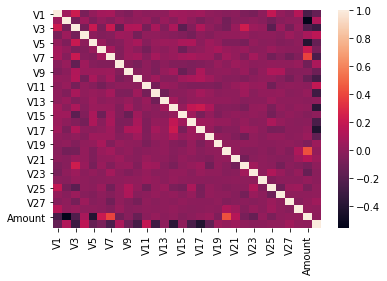

In [0]:
sns.heatmap(df.corr())

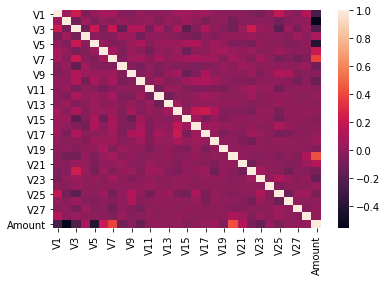

In [0]:
sns.heatmap(x.corr())

**SNS PirPlot**

In [0]:
sns.pairplot(x)

Output hidden; open in https://colab.research.google.com to view.

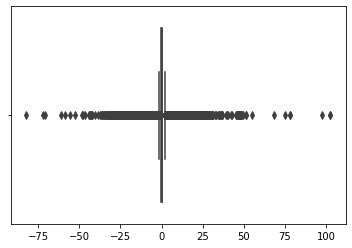

In [0]:
sns.boxplot(x,)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,shuffle=True)

In [0]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver ='lbfgs',random_state=0)

In [0]:
classifier.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
classifier.score(x_train,y_train)

0.9987205506044295

In [0]:
classifier.score(x_test,y_test)

0.9985588305939677

In [0]:
y_pred=classifier.predict(x_test)

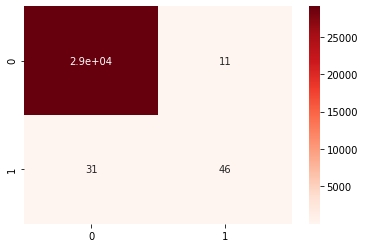

In [0]:
confusion_matrix1=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_matrix1, annot=True,cmap='Reds')

In [0]:
print(confusion_matrix1)

[[29055    11]
 [   31    46]]


In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     29066
         1.0       0.81      0.60      0.69        77

    accuracy                           1.00     29143
   macro avg       0.90      0.80      0.84     29143
weighted avg       1.00      1.00      1.00     29143



In [0]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,precision_recall_curve,r2_score

# **KNN Classification Model**

In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn =KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [0]:
y_pred= knn.predict(x_test)

In [0]:
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [0]:
y_pred_list=y_pred.tolist()

In [0]:
y_list=y_test.tolist()

In [0]:
y_list

In [0]:
df1= pd.DataFrame(list(y_pred_list),columns=['y_pred'])

In [0]:
df1['y']= df1.add(y_list[1])

In [0]:
Fv=np.mean(y_pred != y_test)

In [0]:
Fv_list=Fv.tolist()

In [0]:
df1.head()

,y_pred,y
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


**Prediction & Classification Report**

In [0]:
from sklearn.metrics import classification_report,confusion_matrix,r2_score

In [0]:
print(confusion_matrix(y_test,y_pred))

[[29061     5]
 [   11    66]]


In [0]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     29066
         1.0       0.93      0.86      0.89        77

    accuracy                           1.00     29143
   macro avg       0.96      0.93      0.95     29143
weighted avg       1.00      1.00      1.00     29143



In [0]:
print(r2_score(y_test,y_pred))

0.7916573208667064


In [0]:
from sklearn.metrics import recall_score
recall_score(y_test,y_pred)

0.8571428571428571

In [0]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test,y_pred)

In [0]:
recall

array([1.        , 0.85714286, 0.        ])

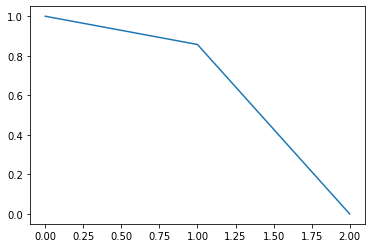

In [0]:
plt.plot(recall)

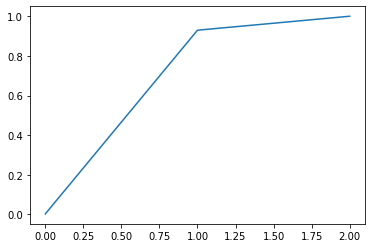

In [0]:
plt.plot(precision)

In [0]:
from sklearn.metrics import roc_auc_score
sklearn.metrics.roc_auc_score(y_test,y_pred)

**Choosing The K Value** 

In [0]:
error_rate = []

for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  pred_i = knn.predict(x_test)
  error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

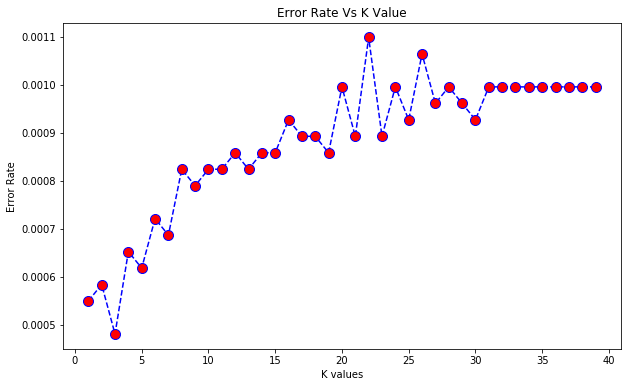

In [0]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate Vs K Value')
plt.xlabel('K values')
plt.ylabel('Error Rate')

In [0]:
knn =KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [0]:
y_pred= knn.predict(x_test)

In [0]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     29066
         1.0       0.94      0.87      0.91        77

    accuracy                           1.00     29143
   macro avg       0.97      0.93      0.95     29143
weighted avg       1.00      1.00      1.00     29143



In [0]:
print(r2_score(y_test,y_pred))

In [0]:
print(confusion_matrix(y_test,y_pred))

[[29062     4]
 [   10    67]]


# **Random Forest Classification Model**

In [0]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
clf.score(x_train,y_train)

1.0

In [0]:
clf.score(x_test,y_test)

0.9995196101979892

In [0]:
y_pred=clf.predict(x_test)

In [0]:
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [0]:
print(confusion_matrix(y_test,y_pred))

[[29063     3]
 [   11    66]]


In [0]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     29066
         1.0       0.96      0.86      0.90        77

    accuracy                           1.00     29143
   macro avg       0.98      0.93      0.95     29143
weighted avg       1.00      1.00      1.00     29143



In [0]:
print(r2_score(y_test,y_pred))

0.8177001557583681


In [0]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [0]:
est = RandomForestClassifier(n_jobs=-1 )
rf_p_list = { 'max_depth':[3,5,10,None],
             'n_estimators':[100,200,300,400,500],
             'max_features': randint(1,3),
             'bootstrap': [True,False],
             'criterion': ['gini','entropy'],
             'min_samples_leaf':randint(1,4)}

def hypertunning_rscv(est,p_list,nbr_iter,x,y):
  rdmsearch = RandomizedSearchCV(est,param_distributions=p_list,n_jobs=-1,n_iter=nbr_iter,cv=5)
  rdmsearch.fit(x,y)
  ht_params = rdmsearch.best_params_
  rd_ht_score = rdmsearch.best_score_
  return ht_params, rd_ht_score_

In [0]:
rf_parameters, rd_ht_score = hypertunning_rscv(est,rf_p_list,40,x,y) 

In [0]:
rf_parameters

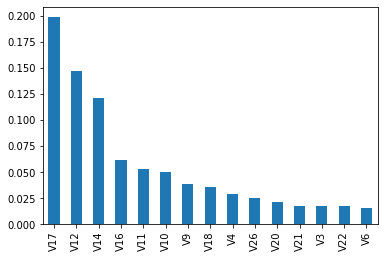

In [0]:
feat_importances = pd.Series(clf.feature_importances_, index=x.columns)
feat_importances.nlargest(15).plot(kind='bar')
plt.show()